In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime, timedelta
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [2]:
df = pd.read_csv("us-counties.csv")

df['date'] = pd.to_datetime(df['date'])

#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [3]:
df_total = df.groupby(['county'], as_index = False).max()
topcounties = df_total.sort_values(by='cases', ascending=False).head(10)
topcounties

,county,date,state,fips,cases,deaths
1032,Los Angeles,2021-10-03,California,6037.0,1463743,26153.0
1226,New York City,2021-10-03,New York,NaN,1085590,34284.0
1074,Maricopa,2021-10-03,Arizona,4013.0,700319,11558.0
1140,Miami-Dade,2021-10-03,Florida,12086.0,661638,8504.0
414,Cook,2021-10-03,Minnesota,27031.0,620602,11603.0
761,Harris,2021-10-03,Texas,48201.0,558618,8414.0
464,Dallas,2021-10-03,Texas,48113.0,389318,4931.0
1516,San Diego,2021-10-03,California,6073.0,373289,4078.0
1466,Riverside,2021-10-03,California,6065.0,363950,5004.0
1515,San Bernardino,2021-10-03,California,6071.0,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [4]:
df_total2 = df.groupby(['state']).max()
df_total2.sort_values(by='cases', ascending=False).head(5)

,date,county,fips,cases,deaths
state,,,,,
California,2021-10-03,Yuba,6115.0,1463743,26153.0
New York,2021-10-03,Yates,36123.0,1085590,34284.0
Arizona,2021-10-03,Yuma,4027.0,700319,11558.0
Florida,2021-10-03,Washington,12133.0,661638,11799.0
Illinois,2021-10-03,Woodford,17203.0,620602,11603.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [5]:
df2 = df[(df['county'].isin(topcounties['county'])) & (df['state'].isin(topcounties['state']))]
df2 = df2.drop(['fips', 'deaths'], axis=1)
df2 = df2.set_index(['county','date'])

In [6]:
def calc_incidence_index(row, df):
    prev_index = (row.name[0], row.name[1] - timedelta(1))
    if prev_index in df.index: 
        return row['cases'] - df.loc[prev_index]['cases']
    else:
        return 0
    
df2['incidence_ind'] = df2.apply(lambda x: calc_incidence_index(x, df2),axis=1)
df2.sort_values('incidence_ind', ascending = False).head(10)

state   cases  incidence_ind
county      date                                         
Los Angeles 2020-12-26  California  706712          29174
            2020-12-16  California  566185          22236
Miami-Dade  2021-08-13     Florida  583845          21655
            2021-08-20     Florida  603878          20033
Los Angeles 2021-01-01  California  790895          19980
Miami-Dade  2021-08-06     Florida  562190          19709
Los Angeles 2021-01-07  California  871749          19239
            2021-01-08  California  889787          18038
            2021-01-14  California  975693          16802
            2021-01-09  California  906554          16767

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [7]:
df3 = df2.groupby(['county'])['incidence_ind'].max()
df3

county
Cook                  6
Dallas             6162
Harris            14129
Los Angeles       29174
Maricopa          11761
Miami-Dade        21655
New York City     16715
Riverside          8341
San Bernardino     8026
San Diego         15453
Name: incidence_ind, dtype: int64

#### Question 5: Plot an incidence curve for the County with the highest peak.

Text(0, 0.5, 'Incidences')

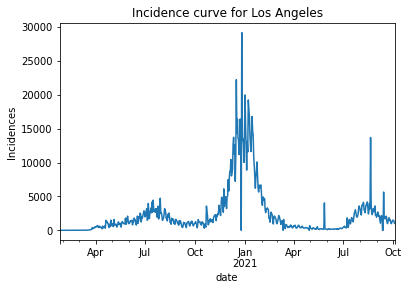

In [8]:
ax1 = df2.loc['Los Angeles']['incidence_ind'].plot(title = "Incidence curve for Los Angeles")
ax1.set_ylabel("Incidences")

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

Text(0, 0.5, 'Incidences')

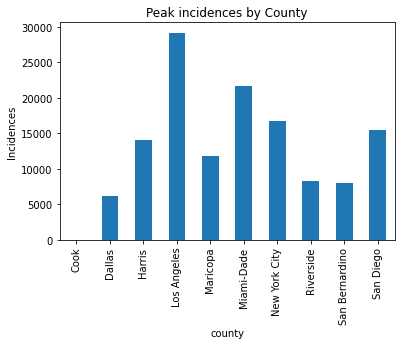

In [9]:
ax2 = df3.plot.bar(title = "Peak incidences by County")
ax2.set_ylabel("Incidences")